### Name- Devshekhar Pattnaik

### Reg No-19BCE1292

### Slot-L19-20


# <center> Web Mining Lab-10 </center>

<br>

### Q1. Implement the algorithm and show the output for “play golf problem”.

<u>Algorithm</u>

1. Read the dataset
2. Calculating the entropy of the whole dataset
3. Calculating the entropy for a feature
4. Calculating information gain for a feature
5. Finding the most informative feature (feature with highest information gain)
6. Adding a node to the tree
7. Shrinking/Updating the dataset according to the pure class

<u>Data structures Used</u>

1. Array
2. Dictionaries

In [1]:
import math

class Node:
    def __init__(self, name):
        self.name = name
        self.label = None
        self.decisionAttr = None
        self.decisionGain = None
        self.decisionValue = None
        self.branches = []

    def printTree(self):
        self.printTreeRecurse(0)

    def printTreeRecurse(self, level):
        print ('\t' * level + self.name),
        if self.decisionAttr and self.decisionGain:
            print ('split by ' + str(self.decisionAttr) + ' for a gain of ' + str(self.decisionGain)),
        if self.label:
            print (' ' + self.label),
        #print ('\n'),
        level += 1
        for branch in self.branches:
            branch.printTreeRecurse(level)

    def predictOutcome(self, cases, a):
        predictions = []
        for c in cases:
            outcome = self.predictOutcomeRecurse(c, attributes)
            predictions.append(outcome)
        return predictions

    def predictOutcomeRecurse(self, case, a):
        if self.name == '':

            # Leaf nodes
            if self.label == '+':
                return 'Yes'
            elif self.label == '-':
                return 'No'

        index = a.index(self.decisionAttr)

        if self.decisionValue == case[index]:
            return self.branches[0].predictOutcomeRecurse(case, a)

        if self.decisionGain:
            # Traverse to the branch where branch.decisionValue is in the case
            for b in self.branches:
                if b.decisionValue == case[index]:
                    return b.predictOutcomeRecurse(case, a)

In [2]:
# Returns the root node of the constructed decision tree
def constructDecisionTree(examples, targetAttribute, attributes):
    root = Node('')

    # Examples are all positive
    # The last attribute in the example is

    if all(isPositive(example[-1]) for example in examples):
        root.label = '+'
        return root

    # Examples are all negative
    elif all(not isPositive(example[-1]) for example in examples):
        root.label = '-'
        return root

    # Attributes is empty
    elif not attributes:
        root.label = getMostCommonLabel(examples)
        return root
    else:
        result = getHighestInfoGainAttr(attributes, examples)
        attr = result[0]
        gain = result[1]
        attrIndex = result[2]

        root.decisionAttr = attr
        root.decisionGain = gain

        possibleValues = uniqueValues(attrIndex, examples)

        for value in possibleValues:
            newBranch = Node(attr + ' = ' + value)
            newBranch.decisionAttr = attr
            newBranch.decisionValue = value
            root.branches.append(newBranch)
            branchExamples = sorted(row for row in examples if row[attrIndex] == value)

            if not branchExamples:
                leaf = Node(getMostCommonValue(targetAttribute, examples, possibleValues))
                newBranch.branches.append(leaf)
            else:
                newExamples = []
                for example in branchExamples:
                    newExample = []
                    for i in range(len(example)):
                        if not i == attrIndex:
                            newExample.append(example[i])
                    newExamples.append(newExample)

                newBranch.branches.append(constructDecisionTree(newExamples, targetAttribute, [a for a in attributes if not a == attr]))

    return root

In [3]:
# Determines whether a word is positive ('yes', 'true', etc.)
def isPositive(word):
    word = word.lower()
    return word == 'yes' or word == 'true' or word == 'y' or word == 't'

In [4]:
# Returns the most common label (+ or -) in the given list of nodes
def getMostCommonLabel(nodes):
    pCount = 0
    nCount = 0

    for node in nodes:
        if node.label == '+':
            pCount += 1
        elif node.label == '-':
            nCount += 1

    if pCount >= nCount:
        return '+'
    else:
        return '-'

In [5]:
# Returns the attribute with the highest information gain, as well as the info gain value
def getHighestInfoGainAttr(attributes, examples):
    totalRows = len(examples)
    # Divide examples into positive and negative
    posExamples = sorted(row for row in examples if isPositive(row[-1]))
    negExamples = sorted(row for row in examples if not isPositive(row[-1]))

    # Get the expected info needed for the entire data set
    allExpectedInfo = computeExpectedInfo(len(posExamples), len(negExamples))

    valuesGain = []

    # Compute the entropy & gain of each attribute
    for i, attr in enumerate(attributes):

        # Don't check the target attribute
        if attributes[-1] == attributes[i]:
            break

        values = uniqueValues(i, examples)

        # Lists for the expected info & probability of each value
        valuesExpectedInfo = []
        valuesProbability = []

        # Compute the expected info needed for each value
        for value in values:
            # Count how many positive & negative examples there are for the value
            posExamplesOfValue = sorted(row for row in posExamples if row[i]==value)
            negExamplesOfValue = sorted(row for row in negExamples if row[i]==value)
            numPos = len(posExamplesOfValue)
            numNeg = len(negExamplesOfValue)
            # Compute the expected info & probability of the value & add them to the lists
            valueExpectedInfo = computeExpectedInfo(numPos, numNeg)
            valueProbability = float(numPos + numNeg) / float(totalRows)
            valuesExpectedInfo.append(valueExpectedInfo)
            valuesProbability.append(valueProbability)

        # Compute entropy & gain of value and add gain to the list
        valueEntropy = computeEntropy(valuesExpectedInfo, valuesProbability)
        valueGain = allExpectedInfo - valueEntropy
        valuesGain.append(valueGain)

    # The index of the attribute with the max gain
    index = valuesGain.index(max(valuesGain))

    return [attributes[index], valuesGain[index], index]

In [6]:
# Returns the expected info needed
# count1 is usually the number of positive examples
# count2 is usually num of negative examples
def computeExpectedInfo(count1, count2):
    count1 = float(count1)
    count2 = float(count2)
    total = count1 + count2
    prob1 = count1/total
    prob2 = count2/total

    # Can't call log(0)
    if prob1 > 0.0 and prob2 > 0.0:
        return -prob1 * math.log(prob1, 2.0) - prob2 * math.log(prob2, 2.0)
    elif prob1 > 0.0:
        return -prob1 * math.log(prob1, 2.0)
    elif prob2 > 0.0:
        return -prob2 * math.log(prob2, 2.0)
    else:
        print ('There was an error computing expected info.')
        return 0

In [7]:
# Compute entropy where p is a list of probabilities for each value and e is a
# list of expected info for each value. p and e should be the same length.
def computeEntropy(p, e):
    entropy = 0.0
    for i in range(len(p)):
        entropy += p[i] * e[i]
    return entropy

In [8]:
# Returns a list of the unique values of the given attribute (given by index) in the given examples
def uniqueValues(attrIndex, examples):
    values = []
    for e in examples:
        if e[attrIndex] not in values:
            values.append(e[attrIndex])
    return values

In [9]:
# Returns the most common value of the attribute in the examples
# Values param is the possible value for that attribute
def getMostCommonValue(attr, examples, values):
    valueCounts = []

    for value in values:
        valueCount = 0
        for example in examples:
            if example[attr] == value:
                valueCount += 1
        valueCounts.append(valueCount)

    maxIndex = valueCounts.index(max(valueCounts))
    return values[maxIndex]

In [10]:
# Returns the decision tree from a file containing training data
# where the first line contains the attributes separated by commas
# and each other line contains a data example
def constructTreeFromFile(filepath):
    f = open(filepath, 'r')
    attrLine = f.readline()
    attributes = [a.strip() for a in attrLine.split(',')]
    examples = []
    for line in f:
        example = [item.strip() for item in line.split(',')]
        examples.append(example)

    # The last attribute is always the target attribute
    return constructDecisionTree(examples, attributes[-1], attributes)

In [11]:
# Returns a list of test cases for the decision tree (examples that don't have
def parseTestCases(filepath):
    f = open(filepath, 'r')
    cases = []
    for line in f:
        case = [item.strip() for item in line.split(',')]
        cases.append(case)

    return cases

In [12]:
def getAttributesFromFile(filepath):
    f = open(filepath, 'r')
    attrLine = f.readline()
    return [a.strip() for a in attrLine.split(',')]

In [13]:
trainingPath = input('Please enter the path to a file containing training data:\n')
tree = constructTreeFromFile(trainingPath)
tree.printTree()

attributes = getAttributesFromFile(trainingPath)
attributes.pop(-1)

testingPath =   input('Please enter the path to a file containing cases to be tested:\n')
testCases = parseTestCases(testingPath)
outcomes = tree.predictOutcome(testCases, attributes)
print (outcomes)

Please enter the path to a file containing training data:
play_tennis.csv

split by Outlook for a gain of 0.2467498197744391
	Outlook = Sunny
		
split by Humidity for a gain of 0.9709505944546686
			Humidity = Normal
				
 +
			Humidity = High
				
 -
	Outlook = Overcast
		
 +
	Outlook = Rain
		
split by Wind for a gain of 0.4199730940219749
			Wind = Strong
				
split by Temperature for a gain of 0.2516291673878229
					Temperature = Cool
						
 -
					Temperature = Mild
						
split by Humidity for a gain of 1.0
							Humidity = High
								
 -
							Humidity = Normal
								
 +
			Wind = Weak
				
 +
Please enter the path to a file containing cases to be tested:
play_tennis_test.csv
['No']


### Q2. Take a collection of documents. Classify using simple decision tree model. Draw your inferences.

In [14]:
from sklearn.tree import DecisionTreeClassifier 
from pprint import pprint 
from sklearn.datasets import fetch_20newsgroups 
from sklearn.feature_extraction.text import CountVectorizer 
from sklearn.feature_extraction.text import TfidfVectorizer 
import numpy as np 
from sklearn.model_selection import cross_val_score 
from sklearn import metrics 
import matplotlib.pyplot as plt 
from sklearn.model_selection import learning_curve 
import pandas as pd 

In [15]:
K_FOLD = 20 
RANDOM_STATE = 730 
MAX_DEPTH = 74 
MIN_SAMPLES_SPLIT = 6 

In [16]:
categories = ['alt.atheism', 'comp.graphics', 'sci.electronics', 'sci.space', 'talk.politics.misc'] 
#categories = ['comp.graphics', 'comp.os.ms-windows.misc', 'comp.sys.ibm.pc.hardware', 'comp.sys.mac.hardware', 'comp.windows.x'] 
news_train = fetch_20newsgroups(subset='train', remove=('headers', 'footers', 'quotes'), categories=categories) #, 'quotes'
news_test = fetch_20newsgroups(subset='test', remove=('headers', 'footers', 'quotes'), categories=categories) #, 'quotes' 
pprint(list(news_train.target_names)) 

['alt.atheism',
 'comp.graphics',
 'sci.electronics',
 'sci.space',
 'talk.politics.misc']


In [17]:
vectorizer = TfidfVectorizer(max_features=10000, stop_words='english') 
news_train_vectors = vectorizer.fit_transform(news_train.data) 
news_test_vectors = vectorizer.transform(news_test.data) 

print(news_train_vectors.shape) 
print(news_train.target.shape) 

(2713, 10000)
(2713,)


In [18]:
Xtr = news_train_vectors # store training feature matrix in "Xtr" 
#print("Xtr:", Xtr) 
#print("Size: ", Xtr.shape) 
Ytr = news_train.target # store training response vector in "ytr" 
#print("Ytr:", Ytr) 

In [19]:
Xtt = news_test_vectors 
#print("Xtt:", Xtt) 
Ytt = news_test.target 
#print("Ytt:", Ytt) 

In [20]:
# Implementing classification model- using Decision Tree Classifier 
clf = DecisionTreeClassifier(ccp_alpha= 0, max_depth=74, random_state=RANDOM_STATE, min_samples_split = MIN_SAMPLES_SPLIT) 
clf.fit(Xtr, Ytr) 
y_pred = clf.predict(Xtt) 
y_pred_score_mnb = clf.predict_proba(Xtt) 

In [21]:
# cross-validation with tree model 
score = cross_val_score(clf, Xtr, Ytr, cv=K_FOLD, scoring='accuracy') 
print("Decision Tree Classifier accuracy: " + str(100 * score.mean()) + "%") 

Decision Tree Classifier accuracy: 59.49019607843138%


In [22]:
# K = np.arange(2,27,2) 
# MAX_DEPTHS = np.arange(1, 80) 
# sc = [] 
# for k in K: 
#     f = [] 
#     for d in MAX_DEPTHS: 
#         f.append(100 * cross_val_score(DecisionTreeClassifier(max_depth=d), Xtr, Ytr, cv=k, scoring='accuracy').mean()) 
#     sc.append(max(f)) 
# plt.plot(K, sc) 
# plt.xlabel('Value of K') 
# plt.ylabel('Score (%)')
# plt.title("Decision tree classifier") 
# plt.show() 
# print("Best K: " + str(K[sc.index(max(sc))])) 
# print("Score: " + str(max(sc))) 


In [23]:
# f = [] 
# MAX_DEPTHS = np.arange(1, 80) 
# for d in MAX_DEPTHS: 
#     f.append(100 * cross_val_score(DecisionTreeClassifier(max_depth=d), Xtr, Ytr, cv=20, scoring='accuracy').mean()) 
# #print(f) 
# plt.plot(MAX_DEPTHS, f) 
# plt.xlabel('Value of MAX_DEPTH parameter') 
# plt.ylabel('Score (%)') plt.title("k = 20") 
# plt.show() 
# print("Best depth: " + str(MAX_DEPTHS[f.index(max(f))])) 
# print("Score: " + str(max(f)))

In [24]:
# f = [] 
# RANDOM_STATES = np.arange(0, 1000, 5) 
# for r in RANDOM_STATES: 
#     f.append(100 * cross_val_score(DecisionTreeClassifier(max_depth=74, random_state=r), Xtr, Ytr, cv=20, scoring='accuracy').mean()) 
# #print(f) 
# plt.plot(RANDOM_STATES, f) 
# plt.xlabel('Value of RANDOM_STATE parameter') 
# plt.ylabel('Score (%)') 
# plt.title("k = 20 and depth = 74") 
# plt.show() 
# print("Best random_state: " + str(RANDOM_STATES[f.index(max(f))])) 
# print("Score: " + str(max(f)))

In [25]:
# ALPHAS = np.arange(0, 1, 0.02) 
# f = [] 
# for a in ALPHAS: 
#     f.append(100 * cross_val_score(DecisionTreeClassifier(ccp_alpha= a, max_depth=74, random_state=RANDOM_STATE, min_samples_split = MIN_SAMPLES_SPLIT), Xtr, Ytr, cv=20, scoring='accuracy').mean()) 
#     print(a) 
# #print(f) 
# plt.plot(ALPHAS, f) 
# plt.xlabel('Value of CCP_ALPHA parameter') 
# plt.ylabel('Score (%)') 
# plt.title("k = 20, depth = 74 and random_state = 730") 
# plt.show() 
# print("Best ccp_alpha: " + str(ALPHAS[f.index(max(f))]))
# print("Score: " + str(max(f)))

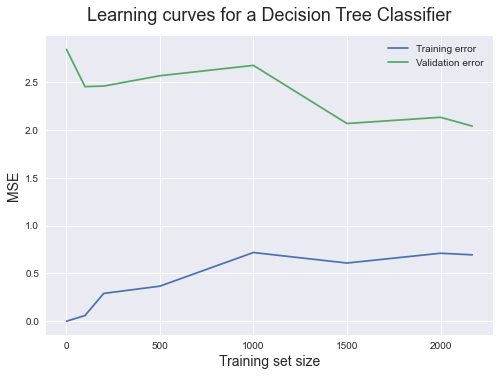

In [28]:
#LEARNING CURVE Mean Squared Error 
train_sizes = [1, 100, 200, 500, 1000, 1500, 2000, 2170] 
train_sizes, train_scores, validation_scores = learning_curve( estimator=DecisionTreeClassifier(max_depth=74, random_state=RANDOM_STATE, min_samples_split = MIN_SAMPLES_SPLIT), X=Xtr, y=Ytr, train_sizes=train_sizes,cv=K_FOLD, scoring='neg_mean_squared_error') 
train_scores_mean = -train_scores.mean(axis = 1) 
validation_scores_mean = -validation_scores.mean(axis = 1) 
plt.style.use('seaborn') 
plt.plot(train_sizes, train_scores_mean, label = 'Training error') 
plt.plot(train_sizes, validation_scores_mean, label = 'Validation error') 
plt.ylabel('MSE', fontsize = 14) 
plt.xlabel('Training set size', fontsize = 14) 
plt.title('Learning curves for a Decision Tree Classifier', fontsize = 18, y = 1.03) 
plt.legend() 
plt.show()

No handles with labels found to put in legend.


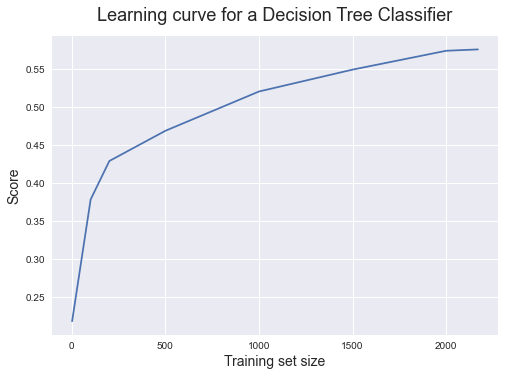

In [27]:
#LEARNING CURVE 
train_sizes = [1, 100, 200, 500, 1000, 1500, 2000, 2170] 
train_sizes, train_scores, validation_scores = learning_curve( DecisionTreeClassifier(max_depth=74, random_state=RANDOM_STATE, min_samples_split = MIN_SAMPLES_SPLIT), Xtr, Ytr, train_sizes=train_sizes,cv=K_FOLD, scoring='accuracy') 

validation_scores_mean = validation_scores.mean(axis = 1) 
plt.style.use('seaborn') 
plt.plot(train_sizes, validation_scores_mean) 
plt.ylabel('Score', fontsize = 14) 
plt.xlabel('Training set size', fontsize = 14) 
plt.title('Learning curve for a Decision Tree Classifier', fontsize = 18, y = 1.03) 
plt.legend()
plt.show()

### <u>Inference</u>

A steep learning curve can be observed using the classification of documents based on topics related to atheism, graphics, electronics, space and politics.